In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
def load_data():
    """
    Завантажує набір даних про житло в Каліфорнії.
    """
    housing = fetch_california_housing()
    X = housing.data    # features
    y = housing.target  # target variable
    feature_names = housing.feature_names
    return X, y, feature_names

In [10]:
def train_model(X_train, y_train):
    """
    Навчає модель лінійної регресії на основі тренувальних даних.

    :param X_train: Ознаки тренувального набору (матриця)
    :param y_train: Цільова змінна тренувального набору (вектор)
    :return: Навчена модель лінійної регресії
    """
    # Ініціалізація моделі лінійної регресії
    model = LinearRegression()

    # Навчання моделі на тренувальних даних
    model.fit(X_train, y_train)

    # Повернення навченої моделі
    return model

In [11]:
def evaluate_model(model, X_test, y_test):
    """
    Оцінює продуктивність навченої моделі на тестових даних.

    :param model: Навчена модель лінійної регресії
    :param X_test: Ознаки тестового набору (матриця)
    :param y_test: Цільова змінна тестового набору (вектор)
    :return: Значення середньоквадратичної помилки (MSE)
    """
    # Передбачення значень на тестових даних
    predictions = model.predict(X_test)

    # Обчислення середньоквадратичної помилки
    mse = mean_squared_error(y_test, predictions)

    # Виведення значення MSE
    print("Середньоквадратична помилка (MSE):", mse)

    # Повернення MSE
    return mse

In [12]:
def perform_cross_validation(X_train, y_train):
    """
    Виконує крос-валідацію для оцінки моделі.

    :param X_train: Ознаки тренувального набору (матриця)
    :param y_train: Цільова змінна тренувального набору (вектор)
    :return: Масив значень середньоквадратичної помилки (MSE) для кожного фолду
    """
    # Ініціалізація моделі лінійної регресії
    model = LinearRegression()

    # Виконання крос-валідації з 5 фолдами та обчисленням MSE
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Перетворення негативних значень MSE на позитивні
    cv_scores = -cv_scores

    # Виведення значень MSE для кожного фолду
    print("Оцінки крос-валідації (MSE):", cv_scores)

    # Виведення середньої оцінки крос-валідації
    print("Середня оцінка крос-валідації (MSE):", np.mean(cv_scores))

    # Повернення значень MSE
    return cv_scores

In [13]:
def main():
    """
    Основна функція, яка виконує всі етапи:
    - Завантаження даних
    - Простий аналіз (EDA)
    - Розподіл даних на тренувальний і тестовий набори
    - Навчання моделі
    - Оцінка моделі
    - Крос-валідація
    """
    # Завантаження даних
    X, y, feature_names = load_data()  # Припускаємо, що функція load_data() уже визначена
    df = pd.DataFrame(X, columns=feature_names)
    df["Target"] = y

    # Проста статистика
    print("Основна статистика:")
    print(df.describe())

    # Матриця кореляцій
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Матриця кореляцій")
    plt.show()

    # Розділення даних на тренувальний і тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Навчання моделі
    model = train_model(X_train, y_train)

    # Оцінка моделі
    mse = evaluate_model(model, X_test, y_test)

    # Крос-валідація
    cv_scores = perform_cross_validation(X_train, y_train)

Основна статистика:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0

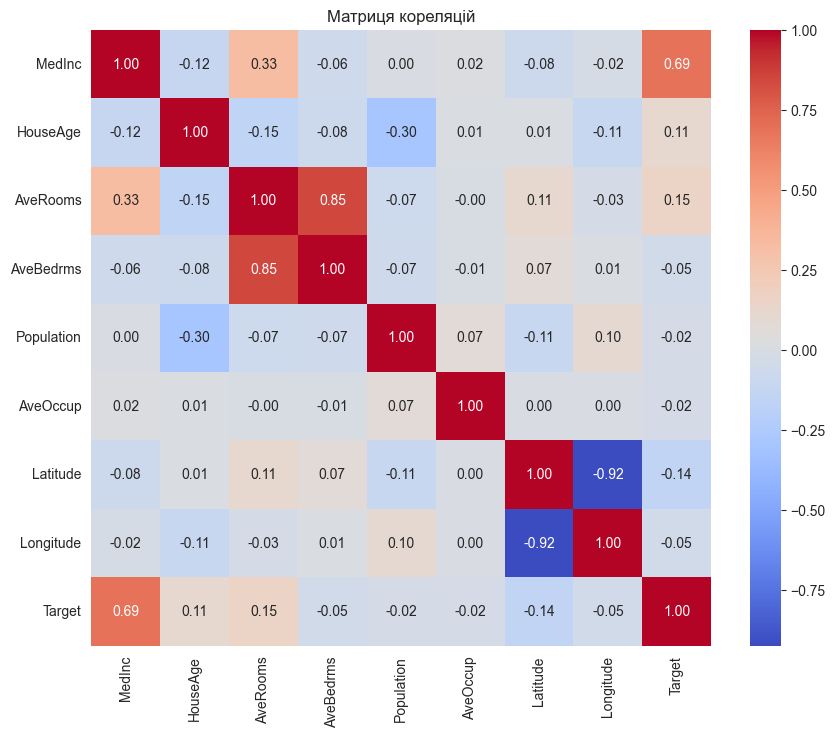

Середньоквадратична помилка (MSE): 0.5558915986952425
Оцінки крос-валідації (MSE): [0.52006533 0.50229277 0.52054451 0.50789718 0.54552622]
Середня оцінка крос-валідації (MSE): 0.5192652011433676


In [14]:
main()